In [16]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets, metrics

path = r'C:\Users\santi\Universidad de Antioquia\VALERIA CADAVID CASTRO - Resultados_Armonizacion_BD'

In [2]:
data_roi=pd.read_feather(r'{path}\Datosparaorganizardataframes\Data_complete_roi.feather'.format(path=path))
data_com=pd.read_feather(r'{path}\Datosparaorganizardataframes\Data_complete_ic.feather'.format(path=path))

In [3]:
data_roi

,participant_id,group,visit,condition,power_F_Delta,power_C_Delta,power_PO_Delta,power_T_Delta,power_F_Theta,power_C_Theta,...,crossfreq_PO_Mbeta3_Gamma,crossfreq_PO_Mgamma_Gamma,crossfreq_T_Mdelta_Gamma,crossfreq_T_Mtheta_Gamma,crossfreq_T_Malpha-1_Gamma,crossfreq_T_Malpha-2_Gamma,crossfreq_T_Mbeta1_Gamma,crossfreq_T_Mbeta2_Gamma,crossfreq_T_Mbeta3_Gamma,crossfreq_T_Mgamma_Gamma
0,sub-001,Control,t1,resteyesc,0.189602,0.176659,0.101200,0.223827,0.066207,0.068513,...,0.168018,0.109982,89.140234,2.750575,0.414048,0.235265,0.286677,0.072954,0.098105,0.077196
1,sub-048,Control,t1,resteyesc,0.375694,0.288320,0.279237,0.143382,0.110032,0.106148,...,0.198484,0.228202,88.493464,2.869721,0.333480,0.176439,0.268310,0.070710,0.128754,0.174227
2,sub-032,Control,t2,resteyesc,0.109964,0.108311,0.068854,0.083404,0.232157,0.194845,...,0.132916,0.133881,79.727876,5.657763,0.769356,0.322866,0.381314,0.100357,0.177042,0.201132
3,sub-033,Control,t1,resteyesc,0.083578,0.103054,0.082122,0.094533,0.242587,0.249982,...,0.120825,0.086615,82.670584,4.803353,0.712749,0.353476,0.368726,0.097342,0.135079,0.099665
4,sub-034,Control,t1,resteyesc,0.216370,0.259794,0.169278,0.195440,0.102207,0.106738,...,0.105230,0.083918,88.670533,2.944692,0.347031,0.165686,0.244780,0.058153,0.124275,0.161687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,sub-CBM00142,Control,V0,protmap,0.200106,0.155914,0.133299,0.181092,0.072175,0.077957,...,0.148937,0.095100,88.616950,2.405921,0.454529,0.303030,0.374266,0.094186,0.124265,0.086150
691,sub-CBM00139,Control,V0,protmap,0.235616,0.213218,0.141323,0.267869,0.056001,0.065528,...,0.118125,0.079648,90.610515,2.671015,0.317979,0.167589,0.231405,0.055597,0.075149,0.050814
692,sub-CBM00181,Control,V0,protmap,0.320241,0.220400,0.227733,0.235943,0.133897,0.115115,...,0.102473,0.060939,90.251077,2.492620,0.327342,0.158792,0.283149,0.072093,0.105446,0.070008
693,sub-CBM00283,Control,V0,protmap,0.297278,0.181701,0.121155,0.188995,0.094440,0.073409,...,0.117141,0.082861,88.536266,2.627921,0.353599,0.261705,0.409050,0.087332,0.123650,0.083185


In [4]:
data_com

,participant_id,visit,group,condition,database,power_C14_Delta,power_C14_Theta,power_C14_Alpha-1,power_C14_Alpha-2,power_C14_Beta1,...,crossfreq_C24_Mbeta3_Gamma,crossfreq_C24_Mgamma_Gamma,crossfreq_C25_Mdelta_Gamma,crossfreq_C25_Mtheta_Gamma,crossfreq_C25_Malpha-1_Gamma,crossfreq_C25_Malpha-2_Gamma,crossfreq_C25_Mbeta1_Gamma,crossfreq_C25_Mbeta2_Gamma,crossfreq_C25_Mbeta3_Gamma,crossfreq_C25_Mgamma_Gamma
0,sub-001,t1,Control,resteyesc,SRM,0.327104,0.090290,0.095894,0.171136,0.116639,...,0.046110,0.130110,0.137692,0.061519,0.298151,0.349850,0.150058,0.019943,0.085524,0.159833
1,sub-048,t1,Control,resteyesc,SRM,0.247386,0.071738,0.066750,0.059420,0.141935,...,0.054412,0.331761,0.124378,0.018468,0.013594,0.017734,0.025123,0.006607,0.036793,0.145007
2,sub-032,t2,Control,resteyesc,SRM,0.140841,0.106433,0.186905,0.049452,0.159093,...,0.073536,0.345448,0.056579,0.195908,0.310995,0.118157,0.034652,0.016495,0.046300,0.145798
3,sub-033,t1,Control,resteyesc,SRM,0.157902,0.154305,0.267533,0.064889,0.145734,...,0.057309,0.159613,0.074133,0.072748,0.166182,0.080233,0.062531,0.019376,0.042643,0.102436
4,sub-034,t1,Control,resteyesc,SRM,0.346331,0.085229,0.076336,0.071917,0.131478,...,0.069607,0.375366,0.138356,0.028879,0.059957,0.082952,0.058469,0.011121,0.036483,0.136901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,sub-CBM00142,V0,Control,protmap,CHBMP,0.129311,0.056886,0.243857,0.346875,0.094494,...,0.065837,0.085042,0.106283,0.074464,0.184053,0.147773,0.041632,0.008653,0.080759,0.048921
689,sub-CBM00139,V0,Control,protmap,CHBMP,0.326392,0.095466,0.103793,0.219377,0.095150,...,0.030620,0.053995,0.133685,0.031298,0.077809,0.091993,0.067116,0.012603,0.038585,0.050885
690,sub-CBM00181,V0,Control,protmap,CHBMP,0.156019,0.093890,0.106951,0.118123,0.238013,...,0.124776,0.256343,0.082982,0.029091,0.023285,0.023307,0.060876,0.020677,0.053764,0.085696
691,sub-CBM00283,V0,Control,protmap,CHBMP,0.257382,0.072319,0.162746,0.282953,0.124002,...,0.037085,0.049992,0.128109,0.050709,0.164024,0.275433,0.171037,0.014025,0.041827,0.043977


In [5]:
# Se quitan los grupos que no van en el clafisicador

data_roi.drop(data_roi[data_roi.group == 'DCL'].index, inplace=True)
data_com.drop(data_com[data_com.group == 'DCL'].index, inplace=True)

In [6]:
# Se extraen las potencias para realizar una prueba con máquinas de soporte vectorial
# revisar posibles pipelines con preprocesamiento (estandarización, normalización)

power_data_roi = data_roi.filter(regex='power')
power_data_roi['group'] = data_roi['group']
power_data_roi

C:\Users\santi\AppData\Local\Temp\ipykernel_16864\2208338475.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  power_data_roi['group'] = data_roi['group']


,power_F_Delta,power_C_Delta,power_PO_Delta,power_T_Delta,power_F_Theta,power_C_Theta,power_PO_Theta,power_T_Theta,power_F_Alpha-1,power_C_Alpha-1,...,power_T_Beta2,power_F_Beta3,power_C_Beta3,power_PO_Beta3,power_T_Beta3,power_F_Gamma,power_C_Gamma,power_PO_Gamma,power_T_Gamma,group
0,0.189602,0.176659,0.101200,0.223827,0.066207,0.068513,0.056224,0.087097,0.276828,0.285323,...,0.034790,0.057521,0.057246,0.043501,0.081341,0.035356,0.020914,0.013962,0.037231,Control
1,0.375694,0.288320,0.279237,0.143382,0.110032,0.106148,0.093774,0.064500,0.113129,0.114430,...,0.046153,0.098691,0.134979,0.120603,0.152258,0.074722,0.094784,0.094766,0.198513,Control
2,0.109964,0.108311,0.068854,0.083404,0.232157,0.194845,0.228018,0.114874,0.362355,0.347684,...,0.070064,0.080207,0.085837,0.052132,0.152723,0.056413,0.059504,0.043838,0.179326,Control
3,0.083578,0.103054,0.082122,0.094533,0.242587,0.249982,0.249030,0.269792,0.385234,0.355509,...,0.029102,0.044424,0.063733,0.029013,0.051463,0.030189,0.025021,0.016097,0.053606,Control
4,0.216370,0.259794,0.169278,0.195440,0.102207,0.106738,0.104244,0.093252,0.184423,0.234110,...,0.031409,0.092634,0.057411,0.049655,0.076847,0.127726,0.057284,0.055487,0.106771,Control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,0.200106,0.155914,0.133299,0.181092,0.072175,0.077957,0.082671,0.088941,0.532705,0.480018,...,0.025289,0.027210,0.029588,0.018004,0.049415,0.020396,0.040166,0.014038,0.040012,Control
691,0.235616,0.213218,0.141323,0.267869,0.056001,0.065528,0.044335,0.080121,0.186176,0.185862,...,0.030539,0.035807,0.038972,0.032115,0.062086,0.024705,0.017078,0.012923,0.036413,Control
692,0.320241,0.220400,0.227733,0.235943,0.133897,0.115115,0.124916,0.108519,0.118561,0.133310,...,0.064260,0.096487,0.117928,0.101108,0.111628,0.033646,0.024477,0.035566,0.056424,Control
693,0.297278,0.181701,0.121155,0.188995,0.094440,0.073409,0.069815,0.083760,0.184525,0.265666,...,0.029774,0.042324,0.032036,0.030495,0.051669,0.024359,0.016696,0.013949,0.040938,Control


In [9]:
clases_mapeadas = {label:idx for idx,label in enumerate(np.unique(power_data_roi['group']))}
clases_mapeadas

{'Control': 0, 'DTA': 1, 'G1': 2, 'G2': 3}

In [10]:
power_data_roi['group'] = power_data_roi['group'].map(clases_mapeadas) 

C:\Users\santi\AppData\Local\Temp\ipykernel_16864\1035531554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  power_data_roi['group'] = power_data_roi['group'].map(clases_mapeadas)


In [11]:
power_data_roi['group'].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    power_data_roi.values[:,:-1],
    power_data_roi.values[:,-1],
    test_size=0.2,
    random_state=1,
    stratify=power_data_roi.values[:,-1])

In [38]:
supvm = SVC(C=10, random_state=1)

In [39]:
supvm.fit(X_train, y_train)

SVC(C=10, random_state=1)

In [40]:
predicted = supvm.predict(X_test)

In [41]:
print(
    f"Classification report for classifier {supvm}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(C=10, random_state=1):
              precision    recall  f1-score   support

         0.0       0.75      0.94      0.84        71
         1.0       1.00      0.80      0.89         5
         2.0       0.61      0.56      0.58        25
         3.0       0.79      0.38      0.51        29

    accuracy                           0.74       130
   macro avg       0.79      0.67      0.71       130
weighted avg       0.74      0.74      0.72       130




Confusion matrix:
[[67  0  3  1]
 [ 1  4  0  0]
 [ 9  0 14  2]
 [12  0  6 11]]


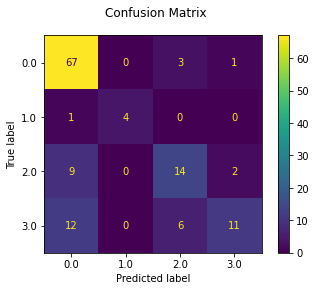

In [42]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [11]:
# Para ver diagramas de dispersión

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

data_roi_scatter = data_roi.select_dtypes(include=numerics)

data_com_scatter = data_com.select_dtypes(include=numerics)

In [12]:
data_com = data_com.sort_values(by='group')

<AxesSubplot:xlabel='power_C14_Theta', ylabel='power_C14_Delta'>

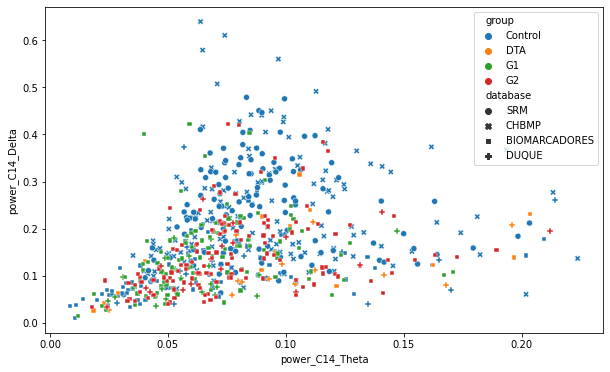

In [13]:
fig = plt.gcf()

fig.set_size_inches(10, 6)
sns.scatterplot(data=data_com,
            y='power_C14_Delta',
            x='power_C14_Theta',
            hue='group',
            style='database',
            )


In [14]:
# Genera los diagramas de dispersión para todas las caracteristicas numericas
# de las ROI'S

""" for i in data_roi_scatter.columns.values[1:]:
    
    fig = plt.gcf()
    fig.set_size_inches(10, 6)
    sns.scatterplot(data=data_roi,
                y=i,
                x='index',
                hue='group',
                style='database',
                 )

    plt.show()
 """

" for i in data_roi_scatter.columns.values[1:]:\n    \n    fig = plt.gcf()\n    fig.set_size_inches(10, 6)\n    sns.scatterplot(data=data_roi,\n                y=i,\n                x='index',\n                hue='group',\n                style='database',\n                 )\n\n    plt.show()\n "

In [15]:
# Genera los diagramas de dispersión para todas las caracteristicas numericas
# de las Componentes

""" for i in data_com_scatter.columns.values[1:]:

    fig = plt.gcf()
    fig.set_size_inches(10, 6)
    sns.scatterplot(data=data_com,
                y=i,
                x='index',
                hue='group',
                style='database',
                )

    plt.show() """

" for i in data_com_scatter.columns.values[1:]:\n\n    fig = plt.gcf()\n    fig.set_size_inches(10, 6)\n    sns.scatterplot(data=data_com,\n                y=i,\n                x='index',\n                hue='group',\n                style='database',\n                )\n\n    plt.show() "

In [16]:
power_data_com = data_com.filter(regex='power')
power_data_com['group'] = data_com['group']
power_data_com

C:\Users\santi\AppData\Local\Temp\ipykernel_16312\4184847902.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  power_data_com['group'] = data_com['group']


,power_C14_Delta,power_C14_Theta,power_C14_Alpha-1,power_C14_Alpha-2,power_C14_Beta1,power_C14_Beta2,power_C14_Beta3,power_C14_Gamma,power_C15_Delta,power_C15_Theta,...,power_C24_Gamma,power_C25_Delta,power_C25_Theta,power_C25_Alpha-1,power_C25_Alpha-2,power_C25_Beta1,power_C25_Beta2,power_C25_Beta3,power_C25_Gamma,group
0,0.051364,0.014170,0.038517,0.036840,0.128756,0.062628,0.208624,0.459102,0.130821,0.027658,...,0.418538,0.126040,0.021880,0.118854,0.083719,0.098417,0.051798,0.148252,0.351040,Control
1,0.123849,0.050573,0.196801,0.137692,0.190550,0.138484,0.103443,0.058608,0.235891,0.112302,...,0.071550,0.110734,0.067652,0.390049,0.172874,0.137910,0.047295,0.047224,0.026262,Control
2,0.086113,0.061844,0.174856,0.116405,0.174375,0.089877,0.131659,0.164872,0.147927,0.217919,...,0.080303,0.105602,0.082669,0.398443,0.176257,0.112945,0.035869,0.047931,0.040284,Control
3,0.122635,0.093048,0.136205,0.109801,0.248049,0.090080,0.111673,0.088508,0.183832,0.144753,...,0.039477,0.249400,0.120137,0.282350,0.124876,0.107510,0.036775,0.048835,0.030118,Control
4,0.258650,0.084168,0.082835,0.122452,0.170350,0.046309,0.122022,0.113214,0.423568,0.126828,...,0.058886,0.224661,0.109231,0.323537,0.109326,0.092462,0.032679,0.060702,0.047402,Control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.161812,0.058283,0.206229,0.156271,0.155841,0.064073,0.104432,0.093060,0.369678,0.086467,...,0.056912,0.098426,0.057216,0.413332,0.250311,0.086018,0.021089,0.035282,0.038326,Control
414,0.260105,0.213918,0.136365,0.085489,0.121338,0.033049,0.087660,0.062075,0.312101,0.291520,...,0.045383,0.261595,0.243108,0.192356,0.087458,0.090081,0.022557,0.055112,0.047733,Control
415,0.042663,0.028603,0.056898,0.167310,0.360637,0.121566,0.182497,0.039824,0.103224,0.076324,...,0.022339,0.045884,0.029652,0.083854,0.423660,0.318126,0.032106,0.052135,0.014584,Control
416,0.040451,0.134720,0.500172,0.194519,0.066996,0.025922,0.028799,0.008421,0.068044,0.210064,...,0.022126,0.050768,0.358984,0.431792,0.061551,0.058956,0.011950,0.014391,0.011608,Control
